# Data Mining Project

This is an educational data set which is collected from learning management system (LMS) called Kalboard 360.

### **Attributes:**

- Gender: student's gender (nominal: 'Male' or 'Female’)

- Nationality: student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’, ’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

- Place of birth: student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

- Educational Stages: educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

- Grade Levels: grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

- Section ID: classroom student belongs (nominal:’A’,’B’,’C’)

- Topic: course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’, ’History’,’ Quran’,’ Geology’)

- Semester: school year semester (nominal:’ First’,’ Second’)

- Parent responsible for student (nominal:’mom’,’father’)

- Raised hand: how many times the student raises their hand on classroom (numeric:0-100)

- Visited resources: how many times the student visits a course content (numeric:0-100)

- Viewing announcement: how many times the student checks the new announcements (numeric:0-100)

- Discussion groups: how many times the student participate on discussion groups (numeric:0-100)

- Parent Answering Survey: parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

- Parent School Satisfaction: the Degree of parent satisfaction from school (nominal:’Yes’,’No’)

- Student Absence Days: the number of absence days for each student (nominal: above-7, under-7)


### **The students are classified into three numerical intervals based on their total grade/mark:**

- Low-Level: interval includes values from 0 to 69

- Middle-Level: interval includes values from 70 to 89

- High-Level: interval includes values from 90-100

#### Which is the classification (decision) attribute.

# Goal

### To find patterns of what criterions lead to a specific grade/level of education

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from sklearn import datasets, preprocessing
import missingno as msno
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis

In [2]:
df = pd.read_csv("education.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.describe(include='all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [5]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


# Remove duplicates

In [6]:
print(df.shape[0] - df.drop_duplicates().shape[0]) 

2


In [7]:
df = df.drop_duplicates()

In [8]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

# Transform data to numerical form

In [9]:
gender = {'gender': {'M': 0, 'F': 1}}
nationality = {'NationalITy': dict()}
births = {'PlaceofBirth': dict()}
stages = {'StageID': dict()}
grades = {'GradeID': dict()}
sections = {'SectionID': dict()}
topics = {'Topic': dict()}
semesters = {'F': 0, 'S': 1}
relations = {'Father': 0, 'Mum': 1}
surveys = {'No': 0, 'Yes': 1}
classes = [gender, nationality, births, stages, grades, sections, topics, semesters, relations, surveys]

i = 1
for nat in df.NationalITy.unique():
    nationality['NationalITy'][nat] = i
    i += 1
    
j = 1    
for birth in df.PlaceofBirth.unique():
    births['PlaceofBirth'][birth] = j
    j += 1
    
s = 1
for stage in df.StageID.unique():
    stages['StageID'][stage] = s
    s += 1
    
x = 1
for grade in df.GradeID.unique():
    grades['GradeID'][grade] = x
    x += 1

y = 1
for sec in df.SectionID.unique():
    sections['SectionID'][sec] = y
    y += 1

d = 1
for topic in df.Topic.unique():
    topics['Topic'][topic] = d
    d += 1

    
for col in df.columns[14:17]:
    i = 1
    for j in df[col].unique():
        df[col] = df[col].apply(lambda x: i if x == j else x)
        i += 1

for cl in classes:
    df.replace(cl, inplace=True)

In [10]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,1,1,1,1,1,1,0,0,15,16,2,20,1,1,1,1
1,0,1,1,1,1,1,1,0,0,20,20,3,25,1,1,1,1
2,0,1,1,1,1,1,1,0,0,10,7,0,30,0,2,2,2
3,0,1,1,1,1,1,1,0,0,30,25,5,35,0,2,2,2
4,0,1,1,1,1,1,1,0,0,40,50,12,50,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,6,6,2,3,1,11,1,0,5,4,5,8,0,2,2,2
476,1,6,6,2,3,1,12,0,0,50,77,14,28,0,2,1,1
477,1,6,6,2,3,1,12,1,0,55,74,25,29,0,2,1,1
478,1,6,6,2,3,1,9,0,0,30,17,14,57,0,2,2,2


# Normalization

In [11]:
X = df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]
cols = df.columns[9:13]

norm = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(X)
X_minmax = pd.DataFrame(norm.transform(X), columns=cols)

In [12]:
X_minmax.head(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,0.15,0.161616,0.020408,0.193878
1,0.20,0.202020,0.030612,0.244898
2,0.10,0.070707,0.000000,0.295918
3,0.30,0.252525,0.051020,0.346939
4,0.40,0.505051,0.122449,0.500000
5,0.42,0.303030,0.132653,0.704082
6,0.35,0.121212,0.000000,0.163265
7,0.50,0.101010,0.153061,0.214286
8,0.12,0.212121,0.163265,0.500000
9,0.70,0.808081,0.255102,0.704082


In [13]:
X_minmax.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,478.000000,478.000000,478.000000
mean,0.468870,0.555302,0.387905,0.432756
std,0.307879,0.333688,0.271668,0.281847
min,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.202020,0.145408,0.193878
50%,0.500000,0.656566,0.336735,0.392857
75%,0.750000,0.848485,0.591837,0.704082
max,1.000000,1.000000,1.000000,1.000000


# Discretization

In [14]:
scale = preprocessing.StandardScaler().fit(X_minmax)
X_scaled = pd.DataFrame(scale.transform(X_minmax), columns=cols)

In [15]:
X_scaled.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,-1.036785,-1.181040,-1.354156,-0.848434
1,-0.874213,-1.059829,-1.316556,-0.667223
2,-1.199357,-1.453763,-1.429356,-0.486011
3,-0.549070,-0.908316,-1.241355,-0.304799
4,-0.223927,-0.150752,-0.978154,0.238835


In [16]:
X_scaled.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,4.780000e+02,4.780000e+02,478.000000,4.780000e+02
mean,1.932438e-16,-2.972982e-17,0.000000,6.689210e-17
std,1.001048e+00,1.001048e+00,1.001048,1.001048e+00
min,-1.524500e+00,-1.665881e+00,-1.429356,-1.537038e+00
25%,-1.004271e+00,-1.059829e+00,-0.893554,-8.484342e-01
50%,1.012161e-01,3.037865e-01,-0.188551,-1.417090e-01
75%,9.140741e-01,8.795354e-01,0.751452,9.636817e-01
max,1.726932e+00,1.334074e+00,2.255458,2.014709e+00


In [17]:
df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]] = X_scaled[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]

In [18]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,1,1,1,1,1,1,0,0,-1.036785,-1.181040,-1.354156,-0.848434,1,1,1,1
1,0,1,1,1,1,1,1,0,0,-0.874213,-1.059829,-1.316556,-0.667223,1,1,1,1
2,0,1,1,1,1,1,1,0,0,-1.199357,-1.453763,-1.429356,-0.486011,0,2,2,2
3,0,1,1,1,1,1,1,0,0,-0.549070,-0.908316,-1.241355,-0.304799,0,2,2,2
4,0,1,1,1,1,1,1,0,0,-0.223927,-0.150752,-0.978154,0.238835,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,6,6,2,3,1,11,1,0,0.263788,0.576510,-0.489352,-0.522253,0,2,2,2
476,1,6,6,2,3,1,12,0,0,-0.549070,-1.150737,-0.902954,0.492532,0,2,1,1
477,1,6,6,2,3,1,12,1,0,-0.386499,-1.241645,-0.564553,0.673743,0,2,1,1
478,1,6,6,2,3,1,9,0,0,NaN,NaN,NaN,NaN,0,2,2,2


# Check for missing values

In [19]:
sum(df.isna().sum()) + sum(df.isnull().sum())  # 16 missing values found

16

Text(0.647, -0.155, 'Missing Values')

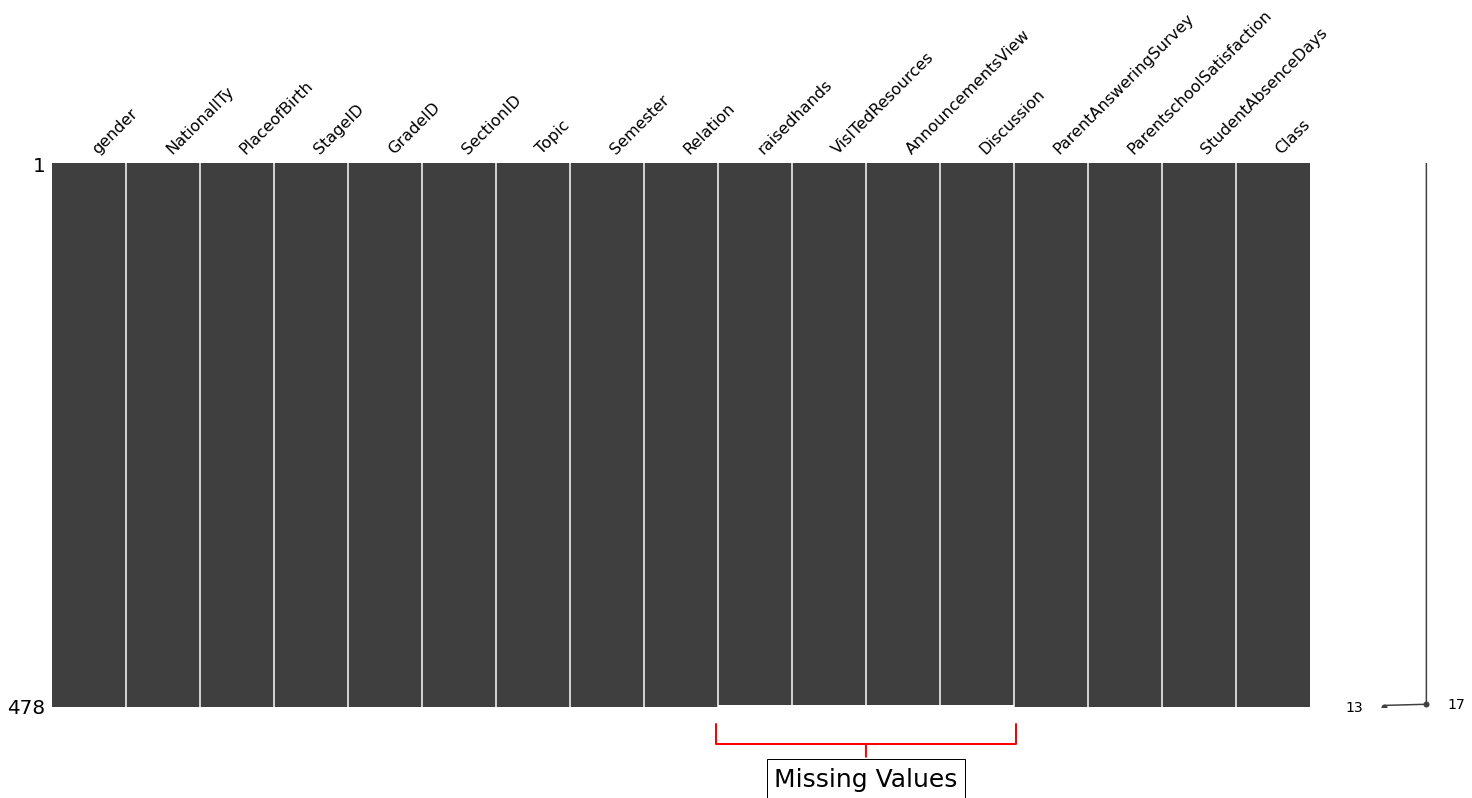

In [20]:
temp = msno.matrix(df)

temp.annotate('Missing Values', xy=(0.647, -0.065), xytext=(0.647, -0.155), xycoords='axes fraction', 
            fontsize=25, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=6, lengthB=0.8', lw=2.0, color='red'))

In [21]:
df = df.dropna()

In [22]:
sum(df.isna().sum()) + sum(df.isnull().sum())  # 1 missing values found

0

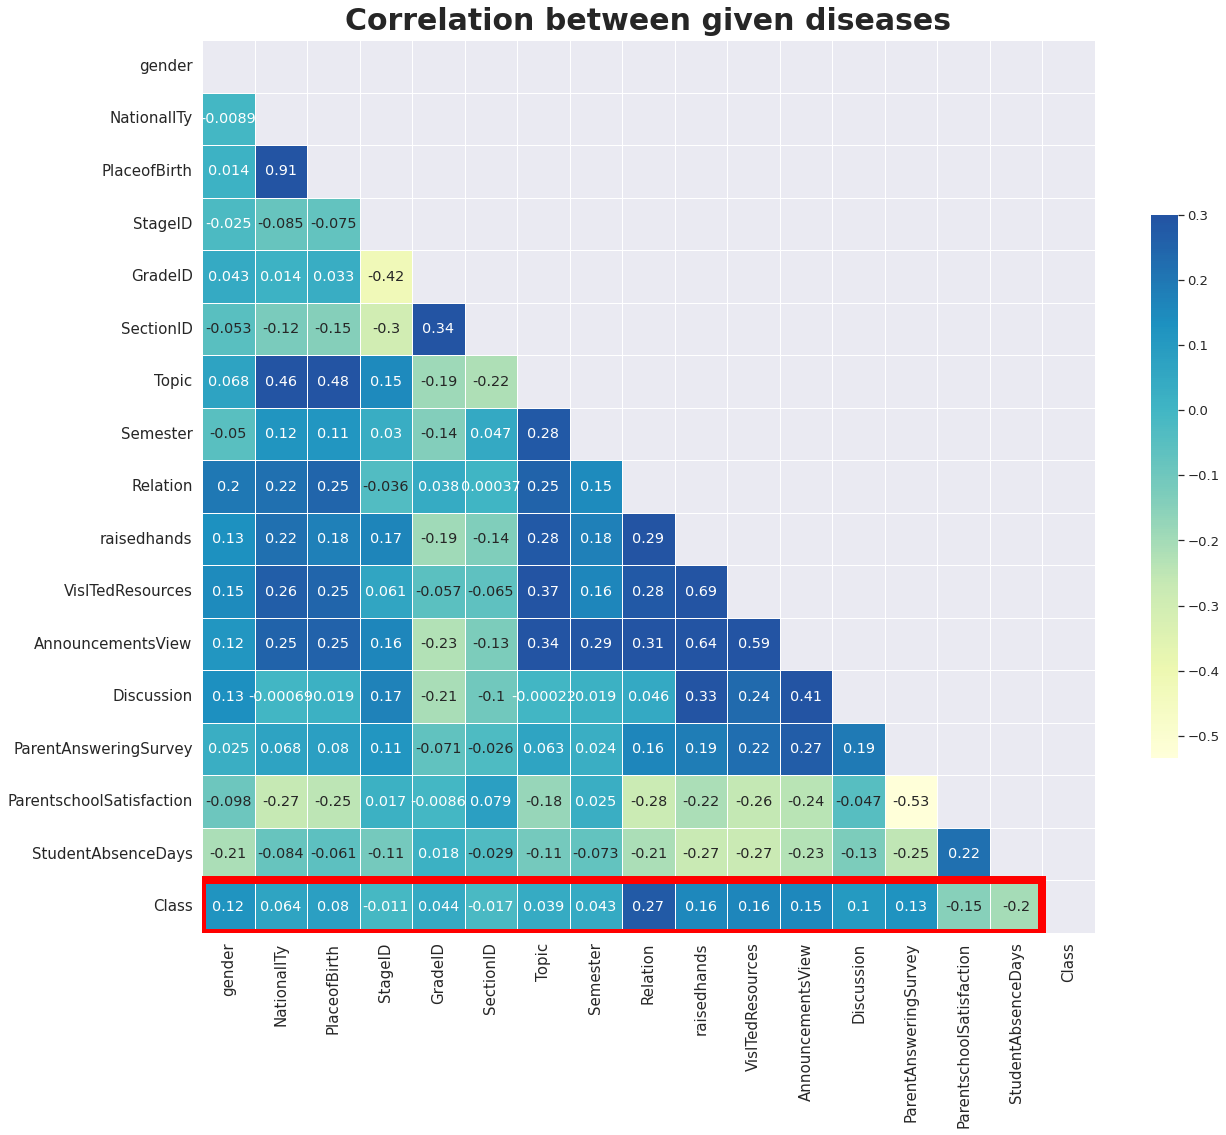

In [23]:
sns.set(font_scale = 1.2)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation between given diseases', fontsize=30, fontweight='bold', pad=10)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticklabels(ax.get_xticklabels(), rotation = 360)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.add_patch(Rectangle((0,16),16,1, fill=False, edgecolor='red', lw=8))

# Drop irrelevant attributes considering their low correlation

In [24]:
df.drop(columns=['StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'NationalITy'], inplace=True)

/tmp/ipykernel_7059/4216429145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'NationalITy'], inplace=True)


# CART Algorithm

In [25]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
text_representation = tree.export_text(clf, feature_names=list(df.columns[:-1]))
print(text_representation)

|--- StudentAbsenceDays <= 1.50
|   |--- Relation <= 0.50
|   |   |--- raisedhands <= 1.06
|   |   |   |--- class: 1
|   |   |--- raisedhands >  1.06
|   |   |   |--- class: 3
|   |--- Relation >  0.50
|   |   |--- VisITedResources <= 0.02
|   |   |   |--- class: 1
|   |   |--- VisITedResources >  0.02
|   |   |   |--- class: 3
|--- StudentAbsenceDays >  1.50
|   |--- AnnouncementsView <= -0.26
|   |   |--- ParentAnsweringSurvey <= 0.50
|   |   |   |--- class: 2
|   |   |--- ParentAnsweringSurvey >  0.50
|   |   |   |--- class: 2
|   |--- AnnouncementsView >  -0.26
|   |   |--- ParentAnsweringSurvey <= 0.50
|   |   |   |--- class: 2
|   |   |--- ParentAnsweringSurvey >  0.50
|   |   |   |--- class: 1



In [27]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [28]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [29]:
rules = get_rules(clf, list(df.columns[:-1]), list(df["Class"]))
for r in rules:
    print(r)

if (StudentAbsenceDays <= 1.5) and (Relation <= 0.5) and (raisedhands <= 1.06) then class: 1 (proba: 71.28%) | based on 94 samples
if (StudentAbsenceDays <= 1.5) and (Relation > 0.5) and (VisITedResources > 0.016) then class: 2 (proba: 72.62%) | based on 84 samples
if (StudentAbsenceDays > 1.5) and (AnnouncementsView <= -0.264) and (ParentAnsweringSurvey <= 0.5) then class: 1 (proba: 91.8%) | based on 61 samples
if (StudentAbsenceDays > 1.5) and (AnnouncementsView > -0.264) and (ParentAnsweringSurvey > 0.5) then class: 1 (proba: 82.35%) | based on 34 samples
if (StudentAbsenceDays > 1.5) and (AnnouncementsView <= -0.264) and (ParentAnsweringSurvey > 0.5) then class: 1 (proba: 65.52%) | based on 29 samples
if (StudentAbsenceDays > 1.5) and (AnnouncementsView > -0.264) and (ParentAnsweringSurvey <= 0.5) then class: 1 (proba: 60.71%) | based on 28 samples
if (StudentAbsenceDays <= 1.5) and (Relation > 0.5) and (VisITedResources <= 0.016) then class: 1 (proba: 57.14%) | based on 28 samples

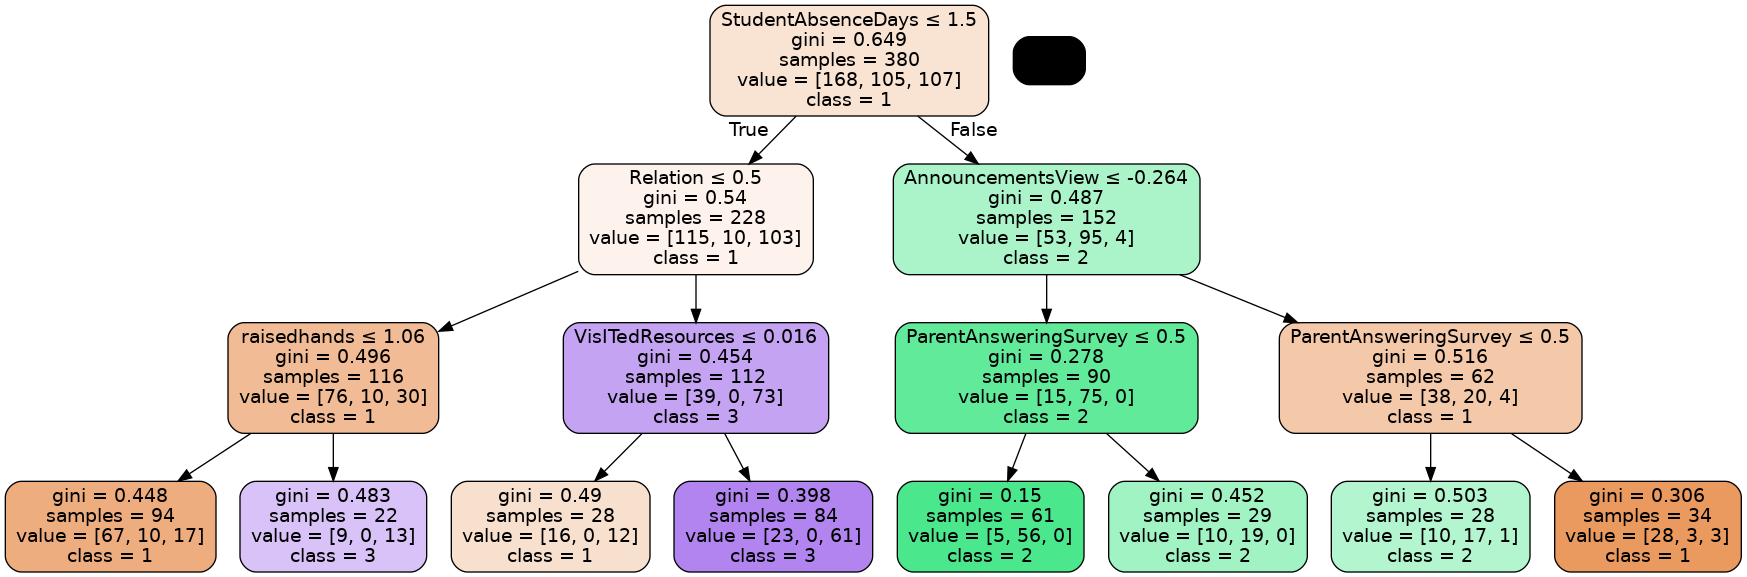

In [30]:
feature_cols = list(X.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.58      0.63        43
           2       0.64      0.89      0.74        18
           3       0.74      0.74      0.74        35

    accuracy                           0.70        96
   macro avg       0.69      0.74      0.71        96
weighted avg       0.70      0.70      0.69        96



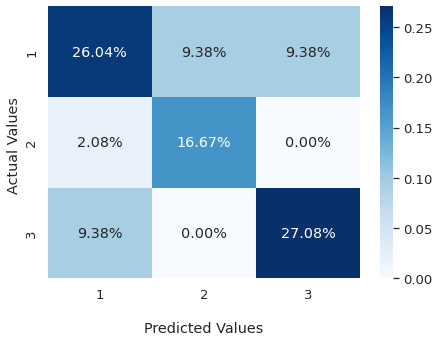

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['1', '2', '3'])
ax.yaxis.set_ticklabels(['1', '2', '3'])

plt.show()

# Check CART accuracy using Snorkel

### Convert dataframe data into text

In [33]:
attributes = list(df.columns)
text = ''

for x in range(476):
    if x not in [326, 327]:
        row = np.array(df.loc[[x]])[0]
        for i in range(len(row) - 1):
            text += str(attributes[i]) + ' ' + str(row[i]) + ' '
        text += '\n'

In [34]:
text_file = open("education_in_text.txt", "w")
 
text_file.write(text)
 
text_file.close()

In [35]:
read_file = pd.read_csv (r'education_in_text.txt')
read_file.to_csv (r'education_in_csv.csv', index=None)

In [44]:
MID = 1
LOW = 2
HIGH = 3

df_snorkel = pd.read_csv('education_in_csv.csv', sep='\t', header=None, names=['text'])
df_snorkel['old_label'] = df.Class
df_snorkel.drop(df_snorkel[df_snorkel.old_label.isna()].index, inplace=True)
Y = np.array(df_snorkel['old_label'])

df_snorkel['label'] = -1
df_snorkel

,text,old_label,label
0,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
1,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
2,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,2.0,-1
3,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,2.0,-1
4,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
...,...,...,...
469,gender 0.0 PlaceofBirth 6.0 Relation 0.0 raise...,2.0,-1
470,gender 0.0 PlaceofBirth 13.0 Relation 0.0 rais...,1.0,-1
471,gender 0.0 PlaceofBirth 13.0 Relation 0.0 rais...,1.0,-1
472,gender 1.0 PlaceofBirth 6.0 Relation 0.0 raise...,1.0,-1


In [37]:
abstain_idx = df_snorkel.label == -1

df_train = df_snorkel[abstain_idx]
df_test = df_snorkel[~abstain_idx]
df_train

,text,old_label,label
0,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
1,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
2,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,2.0,-1
3,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,2.0,-1
4,gender 0.0 PlaceofBirth 1.0 Relation 0.0 raise...,1.0,-1
...,...,...,...
469,gender 0.0 PlaceofBirth 6.0 Relation 0.0 raise...,2.0,-1
470,gender 0.0 PlaceofBirth 13.0 Relation 0.0 rais...,1.0,-1
471,gender 0.0 PlaceofBirth 13.0 Relation 0.0 rais...,1.0,-1
472,gender 1.0 PlaceofBirth 6.0 Relation 0.0 raise...,1.0,-1


In [38]:
@labeling_function()
def mid1(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) <= 1.5) and ('Relation' in l and float(l[l.index('Relation') + 1]) <= 0.5) and ('raisedhands' in l and float(l[l.index('Relation') + 1]) <= 1.06):
        return MID
    else:
        return -1

@labeling_function()
def low1(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) <= 1.5) and ('Relation' in l and float(l[l.index('Relation') + 1]) > 0.5) and ('VisITedResources' in l and float(l[l.index('Relation') + 1]) > 0.016):
        return LOW
    else:
        return -1

@labeling_function()
def mid2(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) > 1.5) and ('AnnouncementsView' in l and float(l[l.index('AnnouncementsView') + 1]) <= -0.264) and ('ParentAnsweringSurvey' in l and float(l[l.index('ParentAnsweringSurvey') + 1]) <= 0.5):
        return MID
    else:
        return -1
    
@labeling_function()
def mid3(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) > 1.5) and ('AnnouncementsView' in l and float(l[l.index('AnnouncementsView') + 1]) > -0.264) and ('ParentAnsweringSurvey' in l and float(l[l.index('ParentAnsweringSurvey') + 1]) > 0.5):
        return MID
    else:
        return -1
    
@labeling_function()
def mid4(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) > 1.5) and ('AnnouncementsView' in l and float(l[l.index('AnnouncementsView') + 1]) > -0.264) and ('ParentAnsweringSurvey' in l and float(l[l.index('ParentAnsweringSurvey') + 1]) <= 0.5):
        return MID
    else:
        return -1
    
@labeling_function()
def mid5(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) <= 1.5) and ('VisITedResources' in l and float(l[l.index('VisITedResources') + 1]) <= 0.016):
        return MID
    else:
        return -1
    
@labeling_function()
def low2(sms):
    l = sms.text.split()
    if ('StudentAbsenceDays' in l and float(l[l.index('StudentAbsenceDays') + 1]) <= 1.5) and ('Relation' in l and float(l[l.index('Relation') + 1]) <= 0.5) and ('raisedhands' in l and float(l[l.index('raisedhands') + 1]) > 1.06):
        return LOW
    else:
        return -1

In [39]:
lfs = [mid1, mid2, mid3, mid4, mid5, low1, low2]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)

100%|██████████████████████████████████████| 472/472 [00:00<00:00, 11194.99it/s]


In [48]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
mid1,0,[1],0.302966,0.188559,0.067797
mid2,1,[1],0.163136,0.000000,0.000000
mid3,2,[1],0.093220,0.000000,0.000000
mid4,3,[1],0.069915,0.000000,0.000000
mid5,4,[1],0.194915,0.194915,0.074153
low1,5,[2],0.300847,0.069915,0.069915
low2,6,[2],0.067797,0.067797,0.067797


In [ ]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary(Y=Y)